https://www.kaggle.com/code/hasanemrebaryank/flowers-recognition-with-cnn#Importing-Data

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# data visualization and manipulation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

import cv2
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

2023-05-08 17:26:35.028055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# print(os.listdir("data/aachen_small"))

# X = []
# Z = []

# fog0 = "data/aachen_small/0"
# fog1 = "data/aachen_small/1"
# fog2 = "data/aachen_small/2"

print(os.listdir("data/aachen_large"))

X = []
Z = []

## Import data

fog0 = "data/aachen_large/0"
fog1 = "data/aachen_large/1"
fog2 = "data/aachen_large/2"

['0', '1', '2']


In [3]:
def assign_label(img, fog_type):
    """assign categoricla label to fog images
    """
    return fog_type

In [4]:
def make_train_data(fog_type,DIR):
    """prepare the training data
    """
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,fog_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (256, 256))
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data("fog0",fog0)
print(len(X))

100%|█████████████████████████████████████████| 174/174 [00:14<00:00, 11.85it/s]

174


In [6]:
make_train_data("fog1",fog1)
print(len(X))

100%|█████████████████████████████████████████| 174/174 [00:15<00:00, 11.58it/s]

348


In [7]:
make_train_data("fog2",fog2)
print(len(X))

100%|█████████████████████████████████████████| 174/174 [00:14<00:00, 11.83it/s]

522


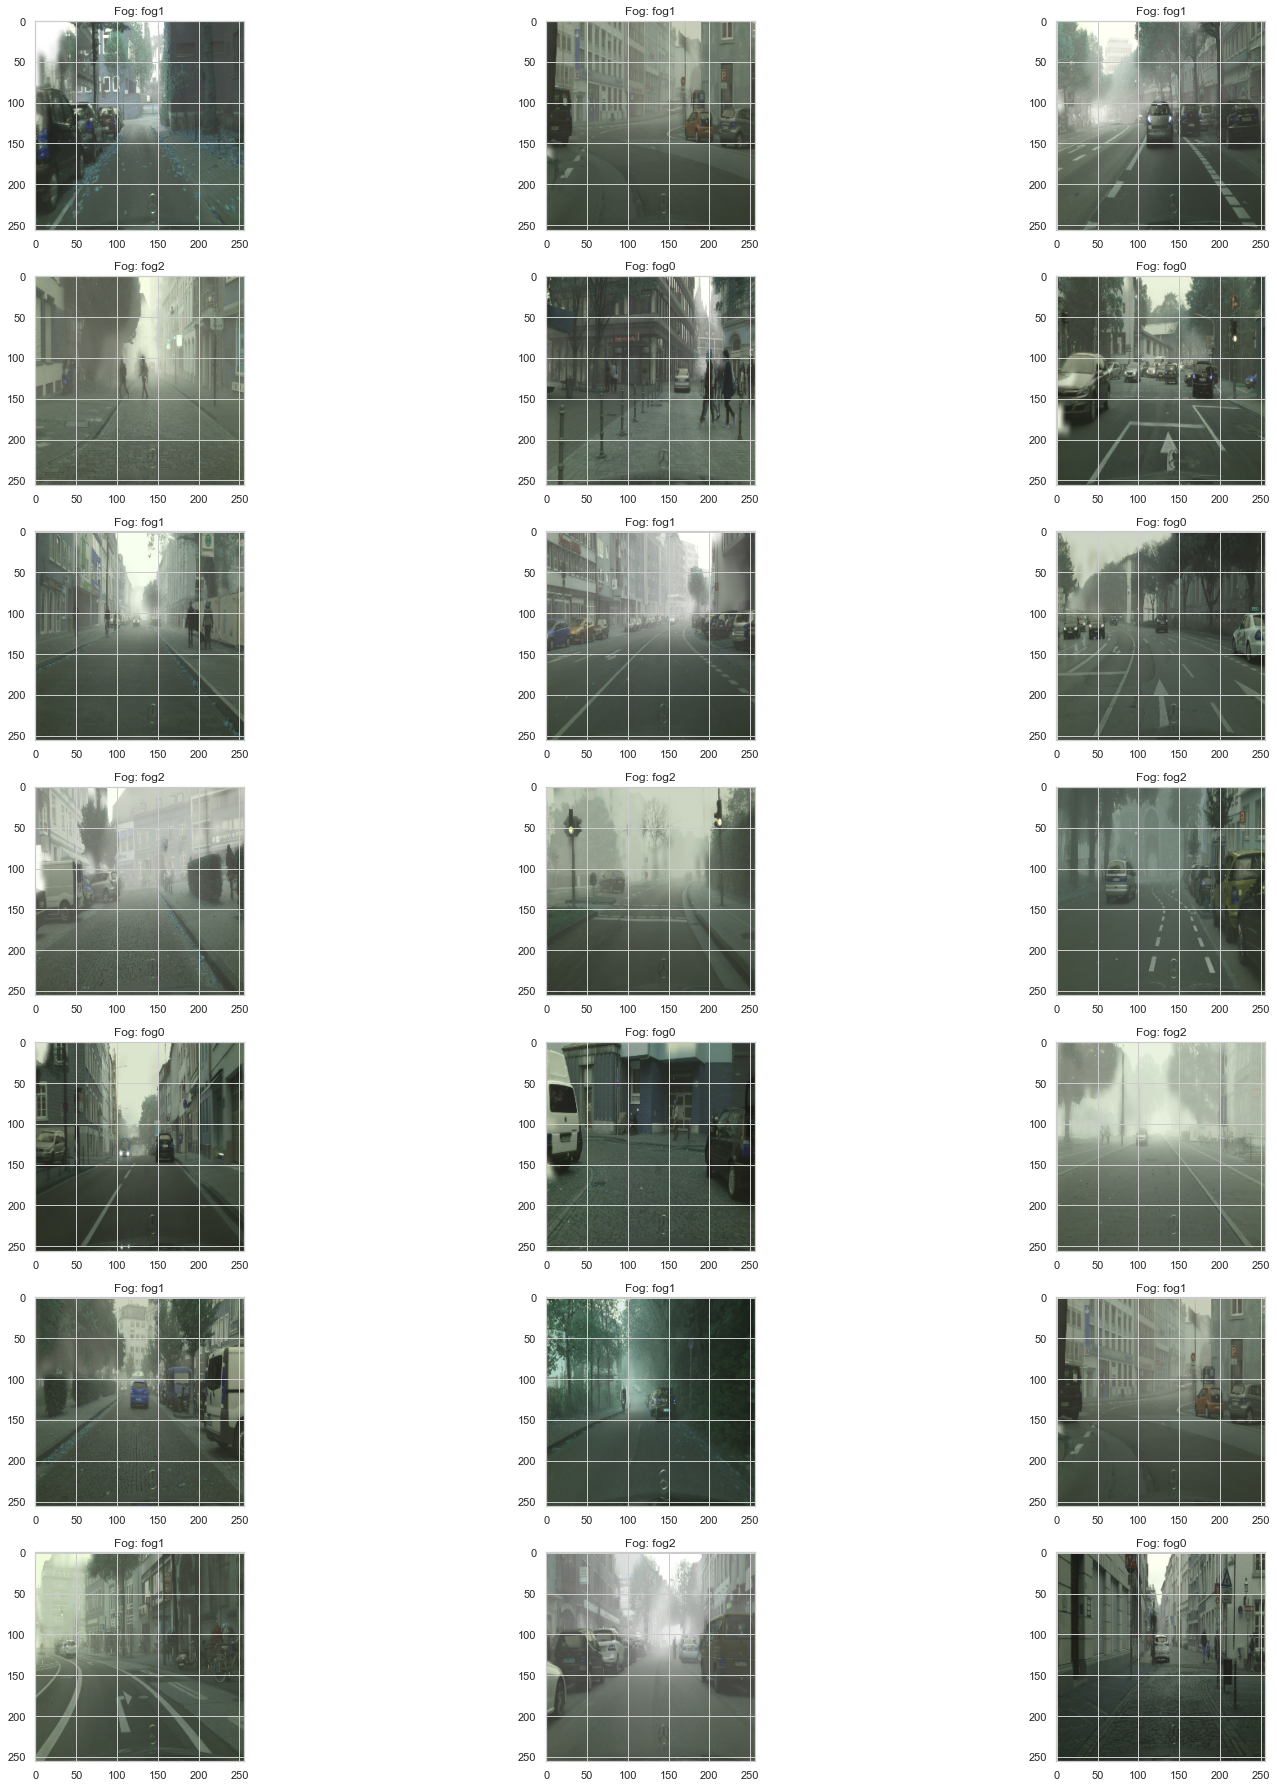

In [8]:
f,ax = plt.subplots(7,3)
f.set_size_inches(25,25)
for i in range(7):
    for j in range(3):
        l = rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title("Fog: " + Z[l])

plt.tight_layout()

In [9]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Z)
Y = to_categorical(Y,3)
X = np.array(X)
X = X/ 255

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (417, 256, 256, 3)
x_test shape:  (105, 256, 256, 3)
y_train shape:  (417, 3)
y_test shape:  (105, 3)


In [11]:
## model specification

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "Same", activation="relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(3, activation="softmax"))

2023-05-08 17:27:46.106291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Epochs and Batch Size
epochs = 32
batch_size = 32

In [13]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [14]:
# train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [15]:


# summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 96)       0

In [17]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size), 
                              epochs= epochs, 
                              validation_data=(x_test,y_test), 
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/32
13/13 [==============================] - 94s 7s/step - loss: 1.1870 - accuracy: 0.3403 - val_loss: 1.1093 - val_accuracy: 0.3048
Epoch 2/32
13/13 [==============================] - 59s 4s/step - loss: 1.0940 - accuracy: 0.3481 - val_loss: 1.1574 - val_accuracy: 0.3048
Epoch 3/32
13/13 [==============================] - 54s 4s/step - loss: 1.1180 - accuracy: 0.2909 - val_loss: 1.1111 - val_accuracy: 0.3048
Epoch 4/32
13/13 [==============================] - 70s 5s/step - loss: 1.1040 - accuracy: 0.3429 - val_loss: 1.0938 - val_accuracy: 0.3048
Epoch 5/32
13/13 [==============================] - 55s 4s/step - loss: 1.0848 - accuracy: 0.4026 - val_loss: 1.1808 - val_accuracy: 0.3048
Epoch 6/32
13/13 [==============================] - 48s 4s/step - loss: 1.0914 - accuracy: 0.3662 - val_loss: 1.0829 - val_accuracy: 0.2952
Epoch 7/32
13/13 [==============================] - 53s 4s/step - loss: 1.0474 - accuracy: 0.4883 - val_loss: 1.2489 - val_accuracy: 0.3524
Epoch 8/32
13/13 [==

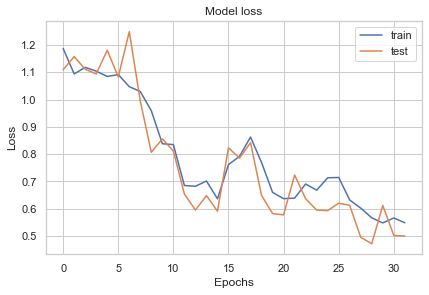

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

In [38]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
import altair as alt
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

In [63]:
print(history.history['loss'])
len(history.history['loss'])

[1.1869546175003052, 1.0940238237380981, 1.1180111169815063, 1.1040323972702026, 1.084758996963501, 1.0913887023925781, 1.0473655462265015, 1.029280662536621, 0.95903080701828, 0.8381618857383728, 0.8350208401679993, 0.6851999163627625, 0.6823701858520508, 0.701668381690979, 0.6365503072738647, 0.7617881298065186, 0.791850209236145, 0.8627662062644958, 0.7694195508956909, 0.660102903842926, 0.6370745897293091, 0.6390485763549805, 0.6908112168312073, 0.6679668426513672, 0.713432252407074, 0.7146507501602173, 0.6319641470909119, 0.6024024486541748, 0.5667364597320557, 0.5481575131416321, 0.5661659836769104, 0.5488045811653137, [1.1092942953109741, 1.1574273109436035, 1.1110751628875732, 1.093758463859558, 1.180770993232727, 1.082857370376587, 1.2489310503005981, 0.994130551815033, 0.8068811297416687, 0.856121301651001, 0.8114947080612183, 0.6539902687072754, 0.5952739715576172, 0.6480669379234314, 0.5913073420524597, 0.8234771490097046, 0.785595715045929, 0.8419831991195679, 0.6490167379

35

In [64]:
train_loss = [1.1869546175003052, 1.0940238237380981, 1.1180111169815063, 1.1040323972702026, 1.084758996963501, 1.0913887023925781, 1.0473655462265015, 1.029280662536621, 0.95903080701828, 0.8381618857383728, 0.8350208401679993, 0.6851999163627625, 0.6823701858520508, 0.701668381690979, 0.6365503072738647, 0.7617881298065186, 0.791850209236145, 0.8627662062644958, 0.7694195508956909, 0.660102903842926, 0.6370745897293091, 0.6390485763549805, 0.6908112168312073, 0.6679668426513672, 0.713432252407074, 0.7146507501602173, 0.6319641470909119, 0.6024024486541748, 0.5667364597320557, 0.5481575131416321, 0.5661659836769104, 0.5488045811653137]

In [69]:
print(history.history['val_loss'])
test_loss = history.history['val_loss']
len(test_loss)

[1.1092942953109741, 1.1574273109436035, 1.1110751628875732, 1.093758463859558, 1.180770993232727, 1.082857370376587, 1.2489310503005981, 0.994130551815033, 0.8068811297416687, 0.856121301651001, 0.8114947080612183, 0.6539902687072754, 0.5952739715576172, 0.6480669379234314, 0.5913073420524597, 0.8234771490097046, 0.785595715045929, 0.8419831991195679, 0.6490167379379272, 0.5823187232017517, 0.577653706073761, 0.7235731482505798, 0.6366060972213745, 0.5952427983283997, 0.5931885838508606, 0.6203826069831848, 0.6123588681221008, 0.49519142508506775, 0.4720175862312317, 0.6120906472206116, 0.5020681023597717, 0.5003445148468018]


32

In [67]:
print(history.history['accuracy'])
train_acc = history.history['accuracy']
len(train_acc)

[0.34025973081588745, 0.34805193543434143, 0.290909081697464, 0.34285715222358704, 0.4025973975658417, 0.366233766078949, 0.48831167817115784, 0.40519481897354126, 0.5558441281318665, 0.5922077894210815, 0.6259739995002747, 0.649350643157959, 0.6649350523948669, 0.6935064792633057, 0.7272727489471436, 0.6467532515525818, 0.6233766078948975, 0.6051948070526123, 0.6370192170143127, 0.7090908885002136, 0.7246752977371216, 0.7090908885002136, 0.6805194616317749, 0.7038961052894592, 0.6571428775787354, 0.6831169128417969, 0.7163461446762085, 0.732467532157898, 0.75, 0.7714285850524902, 0.7116883397102356, 0.7740259766578674]


32

In [68]:
print(history.history['val_accuracy'])
test_acc = history.history['val_accuracy']
len(test_acc)

[0.3047619163990021, 0.3047619163990021, 0.3047619163990021, 0.3047619163990021, 0.3047619163990021, 0.29523810744285583, 0.3523809611797333, 0.4095238149166107, 0.6952381134033203, 0.5428571701049805, 0.6095238327980042, 0.7333333492279053, 0.7523809671401978, 0.7142857313156128, 0.7333333492279053, 0.6190476417541504, 0.7047619223594666, 0.4476190507411957, 0.6952381134033203, 0.7047619223594666, 0.7142857313156128, 0.6666666865348816, 0.723809540271759, 0.6952381134033203, 0.7047619223594666, 0.7047619223594666, 0.7428571581840515, 0.761904776096344, 0.723809540271759, 0.7333333492279053, 0.7428571581840515, 0.7333333492279053]


32

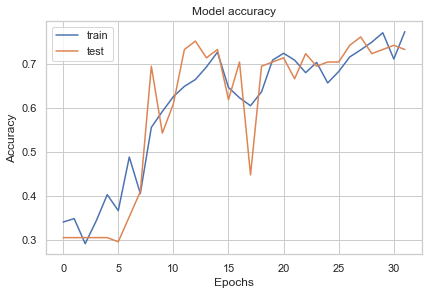

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.show()

In [97]:
losses = train_loss + test_loss
loss_legend = ['Train']*32 + ['Test']*32
iterations = [i for i in range(1, 33)]*2
import pandas as pd
loss_df = pd.DataFrame({
    'Loss': losses,
    'loss_legend': loss_legend,
    'Epoch': iterations
})

In [108]:
chart1 = alt.Chart(loss_df).mark_line().encode(
    x="Epoch:Q",
    y="Loss:Q",
    color=alt.Color(
        "loss_legend:N",
        title = '',
    )
).properties(
    title = 'a',
    width=320
)

In [109]:
acc = train_acc + test_acc
acc_legend = ['Train']*32 + ['Test']*32
iterations = [i for i in range(1, 33)]*2
import pandas as pd
acc_df = pd.DataFrame({
    'accuracy': acc,
    'acc_legend': acc_legend,
    'Epoch': iterations
})

In [110]:
chart2 = alt.Chart(acc_df).mark_line().encode(
    x="Epoch:Q",
    y=alt.Y(
        "accuracy:Q",
        title = 'Accuracy'
    ),
    color=alt.Color(
        "acc_legend:N",
        title = '',
    )
).properties(
    title ='b',
    width=320
)

In [112]:
alt.vconcat(chart1, chart2).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_legend(
    titleFontSize=16,
    labelFontSize=16
).configure_title(
    anchor='start',
    fontSize=22)

alt.VConcatChart(...)